### Importação dos dados



In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [26]:
#Faturamento das lojas

loja_faturamento = loja["Preço"].sum()
loja2_faturamento = loja2["Preço"].sum()
loja3_faturamento = loja3["Preço"].sum()
loja4_faturamento = loja4["Preço"].sum()

#Exibir o resultado dos calculos de faturamento por lojas

print(f"O faturamento da Loja 1 foi de: R${loja_faturamento:,.2f}")
print(f"O faturamento da Loja 2 foi de: R${loja2_faturamento:,.2f}")
print(f"O faturamento da Loja 3 foi de: R${loja3_faturamento:,.2f}")
print(f"O faturamento da Loja 4 foi de: R${loja4_faturamento:,.2f}")

O faturamento da Loja 1 foi de: R$1,534,509.12
O faturamento da Loja 2 foi de: R$1,488,459.06
O faturamento da Loja 3 foi de: R$1,464,025.03
O faturamento da Loja 4 foi de: R$1,384,497.58


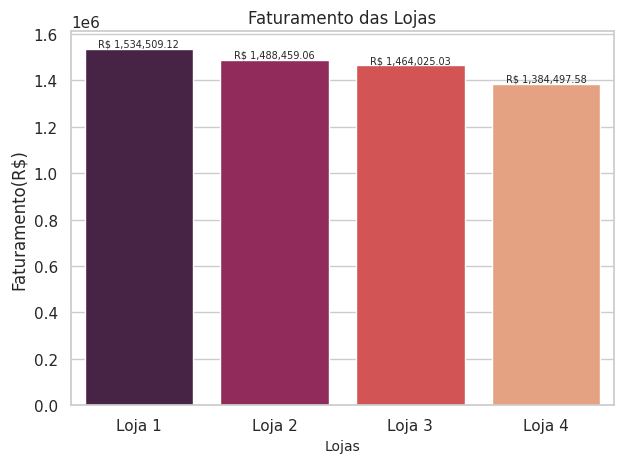

In [27]:
#Importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Exibindo os dados necessários das lojas
Lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
Faturamento = [loja_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]

#Definir o dataframe
df = pd.DataFrame(list(zip(Lojas, Faturamento)), columns = ["Lojas", "Faturamento"])

#Gerar gráficos visuais
sns.set_theme(style="whitegrid")
sns.barplot(x="Lojas", y="Faturamento", data=df, hue="Lojas", palette="rocket")
plt.xlabel("Lojas", fontsize = 10)
plt.ylabel("Faturamento(R$)", fontsize = 12)
plt.title("Faturamento das Lojas")

#Rotulo dos valores
for i, valor in enumerate(df['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

#Ajustar o layout
plt.tight_layout()

#Mostrar o gráfico
plt.show()

# 2. Vendas por Categoria


In [28]:
#Agrupar e contar as categorias de produtos e suas vendas por lojas
categorias_loja = loja.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

#Exibição das categorias mais populares para cada loja
print("Categorias populares da Loja 1:")
print(categorias_loja.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 2:")
print(categorias_loja2.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 3:")
print(categorias_loja3.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias populares da Loja 4:")
print(categorias_loja4.sort_values(by="Quantidade", ascending=False))


Categorias populares da Loja 1:
    Categoria do Produto  Quantidade
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171 

Categorias populares da Loja 2:
    Categoria do Produto  Quantidade
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181 

Categorias populares da Loja 3:
    Categoria do Produto  Quantidade
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277
5           

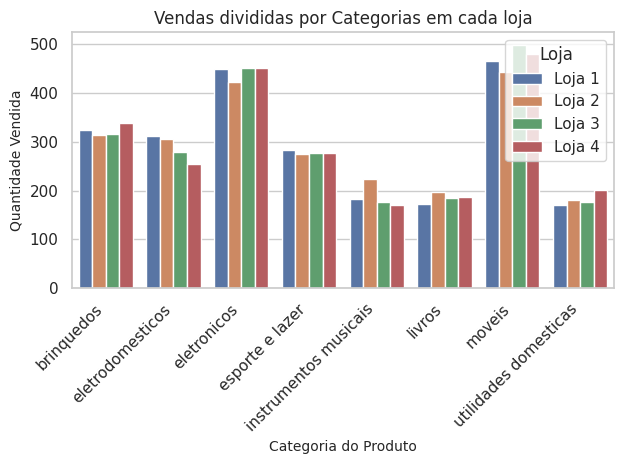

In [29]:
#Importar as bilbiotecas importantes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Identificar as colunas de cada lojas
categorias_loja["Loja"] = "Loja 1"
categorias_loja2["Loja"] = "Loja 2"
categorias_loja3["Loja"] = "Loja 3"
categorias_loja4["Loja"] = "Loja 4"

#formando o dataframe
todas_categorias = pd.concat([categorias_loja, categorias_loja2, categorias_loja3, categorias_loja4])
categorias_count = todas_categorias.groupby(["Loja", "Categoria do Produto"])["Quantidade"].sum().reset_index()


#formatando gráfico
sns.set_theme(style="whitegrid")
sns.barplot(data=categorias_count, x="Categoria do Produto", y="Quantidade", hue ="Loja")
plt.title("Vendas divididas por Categorias em cada loja", fontsize=12)
plt.xlabel("Categoria do Produto", fontsize=10)
plt.ylabel("Quantidade Vendida", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [30]:
lojas = [loja, loja2, loja3, loja4]

for i, df_loja in enumerate(lojas, start=1):
    media = df_loja['Avaliação da compra'].mean()
    print(f"Média da loja {i}: {media:.2f}")

Média da loja 1: 3.98
Média da loja 2: 4.04
Média da loja 3: 4.05
Média da loja 4: 4.00


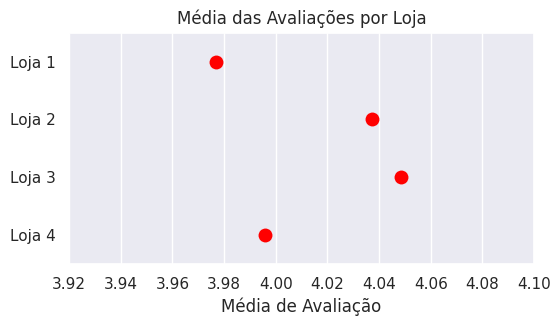

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

media_avaliacoes_list = []
for i, df_loja in enumerate(lojas, start=1):
    media = df_loja['Avaliação da compra'].mean()
    media_avaliacoes_list.append([f"Loja {i}", media])

# Create a Pandas DataFrame from the list
df_avaliacoes = pd.DataFrame(media_avaliacoes_list, columns=['Loja', 'Média de Avaliação']) # Changed this line to create the DataFrame from media_avaliacoes_list

# definindo o estilo e tamanho do gráfico
plt.figure(figsize=(6, 3))
sns.set_style("darkgrid")

# gerando o gráfico de pontos e definindo as cores
sns.stripplot(data=df_avaliacoes, x="Média de Avaliação", y="Loja", size=10, color="red")

# Ajuste do rótulo e título
plt.title("Média das Avaliações por Loja", fontsize=12)
plt.ylabel("")

#Ajuste do layout
plt.xlim(3.92, 4.1)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [32]:
def produtos_vendidos(df_loja, nome_loja):
    #Agrupa os produtos por nome e conta as ocorrências (vendas)
    vendas_por_produto = df_loja.groupby('Produto')['Produto'].count()

    # Encontra o produto mais vendido (índice com maior valor) e quantidade
    produto_mais_vendido = vendas_por_produto.idxmax()
    qtd_mais_vendido = vendas_por_produto.max()

    # Encontra o produto menos vendido (índice com menor valor) e quantidade
    produto_menos_vendido = vendas_por_produto.idxmin()
    qtd_menos_vendido = vendas_por_produto.min()

    print(f"\n{nome_loja}:")
    print(f"Produto mais vendido: {produto_mais_vendido} ({qtd_mais_vendido} unidades)")
    print(f"Produto menos vendido: {produto_menos_vendido} ({qtd_menos_vendido} unidades)")

    return produto_mais_vendido, produto_menos_vendido, qtd_mais_vendido, qtd_menos_vendido

mais_vendido, menos_vendido, qtd_mais_vendido, qtd_menos_vendido = produtos_vendidos(loja, "Loja 1")
mais_vendido2, menos_vendido2, qtd_mais_vendido2, qtd_menos_vendido2 = produtos_vendidos(loja2, "Loja 2")
mais_vendido3, menos_vendido3, qtd_mais_vendido3, qtd_menos_vendido3 = produtos_vendidos(loja3, "Loja 3")
mais_vendido4, menos_vendido4, qtd_mais_vendido4, qtd_menos_vendido4 = produtos_vendidos(loja4, "Loja 4")


Loja 1:
Produto mais vendido: Guarda roupas (60 unidades)
Produto menos vendido: Celular ABXY (33 unidades)

Loja 2:
Produto mais vendido: Iniciando em programação (65 unidades)
Produto menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3:
Produto mais vendido: Kit banquetas (57 unidades)
Produto menos vendido: Blocos de montar (35 unidades)

Loja 4:
Produto mais vendido: Cama box (62 unidades)
Produto menos vendido: Guitarra (33 unidades)


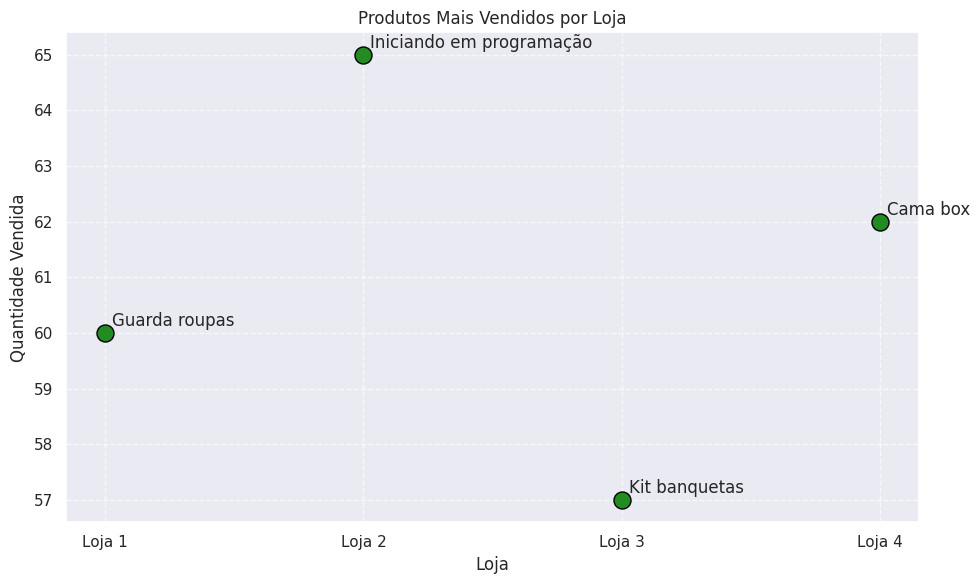

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados dos produtos mais vendidos
dados_mais_vendidos = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Produto': [mais_vendido, mais_vendido2, mais_vendido3, mais_vendido4],
    'Quantidade Vendida': [qtd_mais_vendido, qtd_mais_vendido2, qtd_mais_vendido3, qtd_mais_vendido4]
}

# Criar o DataFrame
mais_vendidos = pd.DataFrame(dados_mais_vendidos)

# Gerar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(mais_vendidos['Loja'], mais_vendidos['Quantidade Vendida'], s=150, color='forestgreen', edgecolors= 'black')

# Adicionar anotações com os nomes dos produtos
for i, txt in enumerate(mais_vendidos['Produto']):
    plt.annotate(txt, (mais_vendidos['Loja'][i], mais_vendidos['Quantidade Vendida'][i]), xytext=(5, 5), textcoords='offset points')

# Configurar o gráfico
plt.title('Produtos Mais Vendidos por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade Vendida')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [34]:
#Calculando a média de valor de frete por loja
mediaFreteLoja1 = loja["Frete"].mean()
mediaFreteLoja2 = loja2["Frete"].mean()
mediaFreteLoja3 = loja3["Frete"].mean()
mediaFreteLoja4 = loja4["Frete"].mean()

print(f"A média de frete da Loja 1 foi de: R${mediaFreteLoja1:,.2f}")
print(f"A média de frete da Loja 2 foi de: R${mediaFreteLoja2:,.2f}")
print(f"A média de frete da Loja 3 foi de: R${mediaFreteLoja3:,.2f}")
print(f"A média de frete da Loja 4 foi de: R${mediaFreteLoja4:,.2f}")

total_frete = mediaFreteLoja1 + mediaFreteLoja2 + mediaFreteLoja3 + mediaFreteLoja4
print(f"O total de frete das 4 lojas foi de: R${total_frete:,.2f}")

A média de frete da Loja 1 foi de: R$34.69
A média de frete da Loja 2 foi de: R$33.62
A média de frete da Loja 3 foi de: R$33.07
A média de frete da Loja 4 foi de: R$31.28
O total de frete das 4 lojas foi de: R$132.67


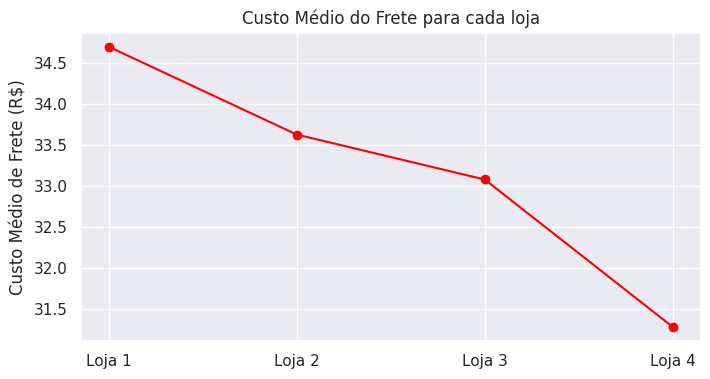

In [35]:
#Importar da biblioteca necessária
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Dados para o gráfico
dados_frete = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Custo Médio de Frete': [mediaFreteLoja1, mediaFreteLoja2, mediaFreteLoja3, mediaFreteLoja4]
}

# Criar o DataFrame
df_frete = pd.DataFrame(dados_frete) # Create the DataFrame

#Tamanho do gráfico
plt.figure(figsize=(8, 4))

#Gerar o gráfico de linhas
plt.plot(df_frete["Loja"], df_frete["Custo Médio de Frete"], marker="o", color="red")

#Ajustando o título e rótulo
plt.title("Custo Médio do Frete para cada loja", fontsize=12)
plt.xlabel("")
plt.ylabel("Custo Médio de Frete (R$)", fontsize=12)

#Amostrar o gráfico
plt.show()

## Relatorio

Depois de uma profunda análise dos dados coletados e amostrados, se chegou a conclusão de que o sr.João deveria
vender a Loja 04 devido ao fato de que atualmente é a loja que está tendo a menor quantidade de vendas comparada com as outras lojas. outra solução se não é possivel vender para loja 04 seria vender e rentar para loja 03 pois os dados indicam que é a loja com a segunda menor desempenhos.